In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# ffmpeg -y -i ../../tmp/karim.MOV ../../tmp/karim/frame_%06d.jpg
# ffmpeg -y -framerate 25 -i ../../tmp/karim_result/frame_%06d.jpg -c:v libx264 -vf fps=25 -pix_fmt yuv420p ../../tmp/karim_result.mp4

In [3]:
import numpy as np
import csv
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import matplotlib

import os
import shutil
import glob
from tqdm import tqdm

from face_mesh_mediapipe import FaceMeshMediaPipe

In [4]:
anchors_path = "./models/face_anchors.csv"
detection_model_path = "./models/face_detection_front.tflite"
landmark_model_path = "./models/face_landmark.tflite"

facemesh_model = FaceMeshMediaPipe(anchors_path, detection_model_path, landmark_model_path)

  0%|          | 0/5 [00:00<?, ?it/s]

-0.14312463 0.28560337 6.940375e-06


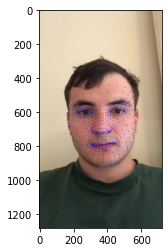

 20%|██        | 1/5 [00:00<00:01,  2.13it/s]

-0.16709606 0.41547275 -0.00023825148


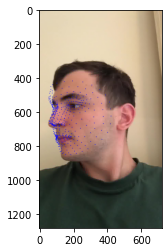

 40%|████      | 2/5 [00:00<00:01,  2.40it/s]

-0.18064429 0.4191232 -0.00010510795


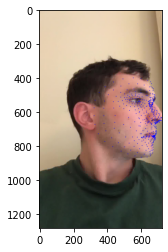

 60%|██████    | 3/5 [00:01<00:00,  2.64it/s]

-0.14810888 0.2692185 9.9175e-05


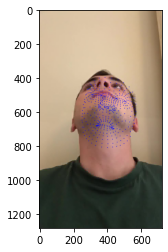

 80%|████████  | 4/5 [00:01<00:00,  2.69it/s]

-0.3048298 0.31769758 0.00034066805


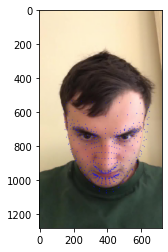

100%|██████████| 5/5 [00:01<00:00,  2.91it/s]


In [5]:
frame_dir = "../../tmp/karim"
result_dir = "../../tmp/karim_result"
frame_names = sorted(os.listdir(frame_dir))[::50]

shutil.rmtree(result_dir, ignore_errors=True)
os.makedirs(result_dir, exist_ok=True)

for frame_name in tqdm(frame_names):
    frame_path = os.path.join(frame_dir, frame_name)
    
    image = cv2.cvtColor(cv2.imread(frame_path), cv2.COLOR_BGR2RGB)
    keypoints_3d, keypoints_3d_normed = facemesh_model(image)
    if keypoints_3d is None:
        keypoints_3d = np.zeros((468, 3))
    
    canvas = image.copy()
    for point in keypoints_3d[:, :2]:
        x, y = int(point[0]), int(point[1])
        canvas = cv2.circle(canvas, (x, y), 2, (0, 0, 255), -1)
    
    print(keypoints_3d[:, 2].min(), keypoints_3d[:, 2].max(), keypoints_3d[:, 2].mean())
    plt.imshow(canvas)
    plt.show()
        
    # save
    cv2.imwrite(os.path.join(result_dir, frame_name), cv2.cvtColor(canvas, cv2.COLOR_BGR2RGB))

In [ ]:
# image = cv2.cvtColor(cv2.imread("./images/olya.png"), cv2.COLOR_BGR2RGB)
# image = cv2.cvtColor(cv2.imread("./images/olya_rot.jpg"), cv2.COLOR_BGR2RGB)
image = cv2.cvtColor(cv2.imread("./images/olya_rot_sq.jpg"), cv2.COLOR_BGR2RGB)

keypoints_2d = facemesh_model(image)

# plt.imshow(image_pad)
plt.imshow(image)
plt.scatter(keypoints_2d[:, 0], keypoints_2d[:, 1])

In [ ]:
!cat /proc/cpuinfo | grep 'model name' | uniq

In [ ]:


plt.imshow(image_pad)
plt.scatter(keypoints_2d_transformed[:, 0], keypoints_2d_transformed[:, 1])

In [ ]:
pad

In [ ]:
keypoints_2d.shape, transformation_matrix_inv.shape

In [ ]:
cv2.warpPerspective(
            image_norm, transformation_matrix, tuple(self.landmark_input_shape)
        )

In [ ]:
import time

In [ ]:
start_time = time.time()

In [ ]:
elapsed_time = time.time() - start_time

In [ ]:
elapsed_time